# Plotting
Plot results obtained when using different updating mechanisms and scenarios.

### Import packages

In [1]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from PIL import Image
mpl.rc('font', family='Times New Roman')

### Paths to directories

In [2]:
# Directory containing results
results_dir = os.path.join(os.path.curdir, os.path.pardir, '2_updating_strategy', 'modules', 'output')

# Output directory
output_dir = os.path.join(os.path.curdir, 'output')

### Parse results
Class used to load and format case results.

In [3]:
class CaseHandler:
    def __init__(self, results_dir):
        # Directory containing model results
        self.results_dir = results_dir
        
        # Case summaries
        self.case_summaries = self._get_case_summaries()
        
    
    def _get_case_summaries(self):
        """Collate information summarising the parameters used in each case   

        Returns
        -------
        case_summaries : pandas DataFrame
            Summary of model parameterisations    
        """

        # Find all results summary files
        case_summary_files = [i for i in os.listdir(self.results_dir) if 'case_summary' in i]

        # Container for dictionaries summarising model cases
        case_summaries = []

        # Open each case summary file and compile in a single dictionary
        for i in case_summary_files:
            with open(os.path.join(self.results_dir, i), 'rb') as f:
                # Load case summary from file
                case_summary = pickle.load(f)

                # Append to dictionary collating all case summaries
                case_summaries.append(case_summary)

        # Convert to DataFrame
        df_case_summaries = pd.DataFrame(case_summaries).set_index('case_id')
        
        # Convert null values in forecast shock field to False (easier for masking later)
        df_case_summaries['forecast_shock'] = df_case_summaries.apply(lambda x: True if x['forecast_shock'] == True else False, axis=1)

        return df_case_summaries
    
    def print_case_descriptions(self):
        """Print descriptions used for each case"""
        
        for index, row in self.case_summaries.iterrows():
            print(index, row['description'])
            
            
    def get_case_id_by_description(self, description):
        """Given description text, get run ID for given case

        Parameters
        ----------
        description : str
            String used to describe case

        Returns
        -------
        case_id : str
            Run ID for the described case    
        """

        # All IDs corresponding to the given case description
        mask = self.case_summaries['description']==description
        ids = self.case_summaries.loc[mask].index

        if len(ids) != 1:
            raise(Exception(f'Should only return 1 case_id, returned : {self.case_summaries.loc[mask].index}'))

        return self.case_summaries.loc[mask].index[0]
    
    def get_case_data(self, case_id, series_name):
        """Extract data for given case_id and series_name

        Parameters
        ----------
        case_id : str
            ID of case for which data should be extracted

        series_name : str
            Name of series for which data should be extracted


        Returns
        -------
        index : list
            Series index

        values : list
            Series values  
        """

        with open(os.path.join(self.results_dir, f'{case_id}_calibration_interval_metrics.pickle'), 'rb') as f:
            calibration_interval_metrics = pickle.load(f)

        index, values = list(calibration_interval_metrics[series_name].keys()), list(calibration_interval_metrics[series_name].values())

        return index, values
    
    
    def get_case_id(self, update_mode, shock_option, forecast_uncertainty_increment, forecast_shock, 
                    revenue_target, renewables_eligibility):
        """Given case parameters, find ID corresponding to case

        Parameters
        ----------
        update_mode : str
            Type of baseline updating used
            Options - NO_UPDATE, MPC_UPDATE, REVENUE_REBALANCE_UPDATE

        shock_option : str
            Type of shock subjected to model
            Options - NO_SHOCK, EMISSIONS_INTENSITY_SHOCK

        anticipated_shock : bool or None
            Denotes if shock was anticipated. Use None if no shock (i.e. not applicable)

        forecast_uncertainty_increment : float
            Scaling factor used when perturbing forecasts

        revenue_neutral : bool
            Defines if revenue neutral target employed. True = revenue neutral target,
            False = Non-revenue neutral target

        renewables_eligible : bool
            Defines if renewables are eligibile for emissions payments 


        Returns
        -------
        case_id : str
            ID of case which satisfies given criteria
        """
        
        mask = ((self.case_summaries['update_mode'] == update_mode)
                & (self.case_summaries['shock_option'] == shock_option)
                & (self.case_summaries['forecast_uncertainty_increment'] == forecast_uncertainty_increment)
                & (self.case_summaries['forecast_shock'] == forecast_shock)
                & (self.case_summaries['revenue_target'] == revenue_target)
                & (self.case_summaries['renewables_eligibility'] == renewables_eligibility)              
               )
        
        if len(self.case_summaries.loc[mask].index) != 1:
            raise(Exception(f'Should only return 1 case_id, returned : {self.case_summaries.loc[mask].index}'))

        return self.case_summaries.loc[mask].index[0]

# Instantiate model object
Case = CaseHandler(results_dir)

# Print case descriptions
Case.print_case_descriptions()

# Summary of parameters used for each case
Case.case_summaries

0369A036 carbon tax - no shocks
08291A40 mpc update - revenue neutral target - no shocks - renewables ineligible
1898B74D mpc update - revenue neutral target - emissions intensity shock unanticipated - renewables ineligible
2400D554 mpc update - revenue ramp up target - no shocks - renewables ineligible
4E019246 mpc update - revenue neutral target - emissions intensity shock - renewables ineligible
7366772B carbon tax - emissions intensity shock
9C8000A6 revenue rebalance update - revenue neutral target - emissions intensity shock unanticipated - renewables ineligible
A0F4FF78 revenue rebalance update - revenue ramp up target - no shocks - renewables ineligible
AA3A93A2 business as usual - no shocks
D158D5D6 revenue rebalance update - revenue neutral target - emissions intensity shock - renewables ineligible
F8B96AF1 business as usual - emissions intensity shock
FB643FF0 revenue rebalance update - revenue neutral target - no shocks - renewables ineligible


,default_baseline,description,forecast_intervals,forecast_shock,forecast_uncertainty_increment,initial_permit_price,initial_rolling_scheme_revenue,model_horizon,renewables_eligibility,revenue_ramp_calibration_interval_start,revenue_ramp_increment,revenue_ramp_intervals,revenue_target,seed,shock_index,shock_option,target_scheme_revenue,update_mode
case_id,,,,,,,,,,,,,,,,,,
0369A036,0.00,carbon tax - no shocks,NaN,False,NaN,40,0,52,NaN,NaN,NaN,NaN,NaN,10,NaN,NO_SHOCKS,NaN,NO_UPDATE
08291A40,1.02,mpc update - revenue neutral target - no shock...,6.0,False,0.05,40,0,52,ineligible,NaN,NaN,NaN,neutral,10,NaN,NO_SHOCKS,"{1: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}, 2: {...",MPC_UPDATE
1898B74D,1.02,mpc update - revenue neutral target - emission...,6.0,True,0.05,40,0,52,ineligible,10.0,3000000.0,10.0,neutral,10,10.0,EMISSIONS_INTENSITY_SHOCK,"{1: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}, 2: {...",MPC_UPDATE
2400D554,1.02,mpc update - revenue ramp up target - no shock...,6.0,False,0.05,40,0,52,ineligible,10.0,3000000.0,10.0,ramp_up,10,NaN,NO_SHOCKS,"{1: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}, 2: {...",MPC_UPDATE
4E019246,1.02,mpc update - revenue neutral target - emission...,6.0,False,0.05,40,0,52,ineligible,NaN,NaN,NaN,neutral,10,10.0,EMISSIONS_INTENSITY_SHOCK,"{1: {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}, 2: {...",MPC_UPDATE
7366772B,0.00,carbon tax - emissions intensity shock,NaN,False,NaN,40,0,52,NaN,NaN,NaN,NaN,NaN,10,10.0,EMISSIONS_INTENSITY_SHOCK,NaN,NO_UPDATE
9C8000A6,1.02,revenue rebalance update - revenue neutral tar...,1.0,True,0.05,40,0,52,ineligible,10.0,3000000.0,10.0,neutral,10,10.0,EMISSIONS_INTENSITY_SHOCK,"{1: {1: 0}, 2: {1: 0}, 3: {1: 0}, 4: {1: 0}, 5...",REVENUE_REBALANCE_UPDATE
A0F4FF78,1.02,revenue rebalance update - revenue ramp up tar...,1.0,False,0.05,40,0,52,ineligible,10.0,3000000.0,10.0,ramp_up,10,NaN,NO_SHOCKS,"{1: {1: 0}, 2: {1: 0}, 3: {1: 0}, 4: {1: 0}, 5...",REVENUE_REBALANCE_UPDATE
AA3A93A2,0.00,business as usual - no shocks,NaN,False,NaN,0,0,52,NaN,NaN,NaN,NaN,NaN,10,NaN,NO_SHOCKS,NaN,NO_UPDATE


### Import results
For each case, import the data to be plotted.

In [4]:
# Forecast uncertainty increment used in models
FORECAST_UNCERTAINTY_INCREMENT = 0.05

# Benchmark carbon tax case - emissions intensity
# -----------------------------------------------
# Run ID
r0 = Case.get_case_id_by_description(description='carbon tax - no shocks')

# Baseline
x_e0, y_e0 = Case.get_case_data(case_id=r0, series_name='average_emissions_intensity_regulated_generators')


# Revenue neutral case - no shocks - revenue re-balancing update
# --------------------------------------------------------------
# Run ID
r1 = Case.get_case_id(update_mode='REVENUE_REBALANCE_UPDATE', shock_option='NO_SHOCKS', forecast_shock=False, 
                     forecast_uncertainty_increment=FORECAST_UNCERTAINTY_INCREMENT, revenue_target='neutral', renewables_eligibility='ineligible')
# Baseline
x_b1, y_b1 = Case.get_case_data(case_id=r1, series_name='baseline')

# Rolling scheme revenue
x_r1, y_r1 = Case.get_case_data(case_id=r1, series_name='rolling_scheme_revenue_interval_end')


# Revenue neutral case - no shocks - MPC
# --------------------------------------
# Run ID
r2 = Case.get_case_id(update_mode='MPC_UPDATE', shock_option='NO_SHOCKS', forecast_shock=False, 
                     forecast_uncertainty_increment=FORECAST_UNCERTAINTY_INCREMENT, revenue_target='neutral', renewables_eligibility='ineligible')
# Baseline
x_b2, y_b2 = Case.get_case_data(case_id=r2, series_name='baseline')

# Rolling scheme revenue
x_r2, y_r2 = Case.get_case_data(case_id=r2, series_name='rolling_scheme_revenue_interval_end')


# Positive revenue target case - no shocks - revenue re-balancing update
# ----------------------------------------------------------------------
# Run ID
r3 = Case.get_case_id(update_mode='REVENUE_REBALANCE_UPDATE', shock_option='NO_SHOCKS', forecast_shock=False, 
                     forecast_uncertainty_increment=FORECAST_UNCERTAINTY_INCREMENT, revenue_target='ramp_up', renewables_eligibility='ineligible')
# Baseline
x_b3, y_b3 = Case.get_case_data(case_id=r3, series_name='baseline')

# Rolling scheme revenue
x_r3, y_r3 = Case.get_case_data(case_id=r3, series_name='rolling_scheme_revenue_interval_end')


# Positive revenue target case - no shocks - MPC
# ----------------------------------------------
# Run ID
r4 = Case.get_case_id(update_mode='MPC_UPDATE', shock_option='NO_SHOCKS', forecast_shock=False,
                     forecast_uncertainty_increment=FORECAST_UNCERTAINTY_INCREMENT, revenue_target='ramp_up', renewables_eligibility='ineligible')
# Baseline
x_b4, y_b4 = Case.get_case_data(case_id=r4, series_name='baseline')

# Rolling scheme revenue
x_r4, y_r4 = Case.get_case_data(case_id=r4, series_name='rolling_scheme_revenue_interval_end')



# Emissions intensity shock
# -------------------------
# Benchmark carbon tax case - emissions intensity
# -----------------------------------------------
# Run ID
r5 = Case.get_case_id_by_description(description='carbon tax - emissions intensity shock')

# Baseline
x_e5, y_e5 = Case.get_case_data(case_id=r5, series_name='average_emissions_intensity_regulated_generators')


# Revenue neutral case - emissions intensity shock - revenue re-balancing update
# ------------------------------------------------------------------------------
# Run ID
r6 = Case.get_case_id(update_mode='REVENUE_REBALANCE_UPDATE', shock_option='EMISSIONS_INTENSITY_SHOCK', forecast_shock=False, 
                     forecast_uncertainty_increment=FORECAST_UNCERTAINTY_INCREMENT, revenue_target='neutral', renewables_eligibility='ineligible')
# Baseline
x_b6, y_b6 = Case.get_case_data(case_id=r6, series_name='baseline')

# Rolling scheme revenue
x_r6, y_r6 = Case.get_case_data(case_id=r6, series_name='rolling_scheme_revenue_interval_end')


# Revenue neutral case - emissions intensity shock - MPC
# ------------------------------------------------------
# Run ID
r7 = Case.get_case_id(update_mode='MPC_UPDATE', shock_option='EMISSIONS_INTENSITY_SHOCK', forecast_shock=False, 
                     forecast_uncertainty_increment=FORECAST_UNCERTAINTY_INCREMENT, revenue_target='neutral', renewables_eligibility='ineligible')
# Baseline
x_b7, y_b7 = Case.get_case_data(case_id=r7, series_name='baseline')

# Rolling scheme revenue
x_r7, y_r7 = Case.get_case_data(case_id=r7, series_name='rolling_scheme_revenue_interval_end')


# Positive revenue target case - emissions intensity shock - revenue re-balancing update
# --------------------------------------------------------------------------------------
# Run ID
r8 = Case.get_case_id(update_mode='REVENUE_REBALANCE_UPDATE', shock_option='EMISSIONS_INTENSITY_SHOCK', forecast_shock=True, 
                     forecast_uncertainty_increment=FORECAST_UNCERTAINTY_INCREMENT, revenue_target='neutral', renewables_eligibility='ineligible')
# Baseline
x_b8, y_b8 = Case.get_case_data(case_id=r8, series_name='baseline')

# Rolling scheme revenue
x_r8, y_r8 = Case.get_case_data(case_id=r8, series_name='rolling_scheme_revenue_interval_end')


# Positive revenue target case - emissions intensity shock - MPC
# --------------------------------------------------------------
# Run ID
r9 = Case.get_case_id(update_mode='MPC_UPDATE', shock_option='EMISSIONS_INTENSITY_SHOCK', forecast_shock=True, 
                     forecast_uncertainty_increment=FORECAST_UNCERTAINTY_INCREMENT, revenue_target='neutral', renewables_eligibility='ineligible')
# Baseline
x_b9, y_b9 = Case.get_case_data(case_id=r9, series_name='baseline')

# Rolling scheme revenue
x_r9, y_r9 = Case.get_case_data(case_id=r9, series_name='rolling_scheme_revenue_interval_end')

## Construct figure
Create a figure comparing the two updating mechanisms for the following cases:
1. Neutral scheme revenue target
2. Positive scheme revenue target
3. An anticipated shock to generator emissions intensities
4. An unanticipated shock to generator emissions intensities

Goal is to observe how the emissions intensity baseline and scheme revenue behave under these different scenarios.

<Figure size 432x288 with 0 Axes>

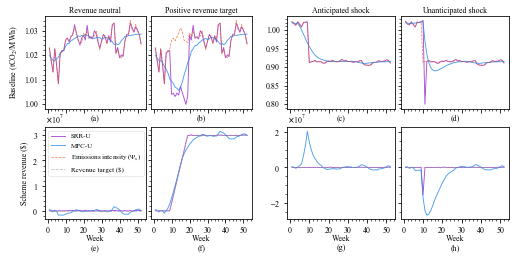

In [5]:
plt.clf()

# Initialise figure object
fig = plt.figure()

# Grid used to investigate different revenue targets
gs1 = gridspec.GridSpec(2, 2)
gs1.update(left=0.07, right=0.48, top=0.95, wspace=0.05)

# Grid used to investigate emissions intensity shocks
gs2 = gridspec.GridSpec(2, 2)
gs2.update(left=0.55, right=0.99, top=0.95, wspace=0.05)


# Parameters
# ----------
# Revenue re-balancing line colour and style
revenue_rebalancing_format = {'color': '#9721ce', 'linewidth': 0.9, 'alpha': 0.8}

# MPC line colour and style
mpc_format = {'color': '#2084e8', 'linewidth': 0.9, 'alpha': 0.8}

# Emissions intensity line
emissions_intensity_format = {'color': '#e85c20', 'linewidth': 0.7, 'alpha': 0.8, 'linestyle': '--'}

# Revenue target line
revenue_target_format = {'color': '#a0a0a0', 'linewidth': 0.8, 'linestyle': '--', 'alpha': 0.7}


# Revenue neutral
# ---------------
# Axis for baseline plots for revenue neutral case
ax1 = plt.subplot(gs1[0, 0])

# Axis for scheme revenue plots for revenue neutral case
ax2 = plt.subplot(gs1[1, 0])


# Revenue rebalancing
# -------------------
# Baseline
l1, = ax1.plot(x_b1, y_b1, **revenue_rebalancing_format)

# Scheme revenue
ax2.plot(x_r1, y_r1, **revenue_rebalancing_format)


# MPC update
# ----------
# Baseline
l2, = ax1.plot(x_b2, y_b2, **mpc_format)

# Scheme revenue
ax2.plot(x_r2, y_r2, **mpc_format)

# Emissions intensity
l3, = ax1.plot(x_e0, y_e0, **emissions_intensity_format)


# Revenue target
# --------------
# Axis for baseline plots when targeting positive scheme revenue
ax3 = plt.subplot(gs1[0, 1], sharey=ax1)

# Axis for scheme revenue plots when targeting positive scheme revenue
ax4 = plt.subplot(gs1[1, 1], sharey=ax2)


# Revenue rebalancing
# -------------------
# Baseline
ax3.plot(x_b3, y_b3, **revenue_rebalancing_format)

# Scheme revenue
ax4.plot(x_r3, y_r3, **revenue_rebalancing_format)

# MPC update
# ----------
# Baseline
ax3.plot(x_b4, y_b4, **mpc_format)

# Scheme revenue
ax4.plot(x_r4, y_r4, **mpc_format)

# Emissions intensity
ax3.plot(x_e0, y_e0, **emissions_intensity_format)


# Emissions intensity shock
# -------------------------
# Axis for baseline when there is an anticipated emissions intensity shock
ax5 = plt.subplot(gs2[0, 0])

# Axis for scheme revenue when there is an anticipated emissions intensity shock
ax6 = plt.subplot(gs2[1, 0])

# Revenue rebalancing
# -------------------
# Baseline
ax5.plot(x_b6, y_b6, **revenue_rebalancing_format)

# Scheme revenue
ax6.plot(x_r6, y_r6, **revenue_rebalancing_format)

# MPC update
# ----------
# Baseline
ax5.plot(x_b7, y_b7, **mpc_format)

# Scheme revenue
ax6.plot(x_r7, y_r7, **mpc_format)

# Emissions intensity
ax5.plot(x_e5, y_e5, **emissions_intensity_format)


# Emissions intensity shock
# -------------------------
# Axis for baseline when there is an unanticipated emissions intensity shock
ax7 = plt.subplot(gs2[0, 1], sharey=ax5)

# Axis for scheme revenue when there is an unanticipated emissions intensity shock
ax8 = plt.subplot(gs2[1, 1], sharey=ax6)

# Revenue rebalancing
# -------------------
# Baseline
ax7.plot(x_b8, y_b8, **revenue_rebalancing_format)

# Scheme revenue
ax8.plot(x_r8, y_r8, **revenue_rebalancing_format)

# MPC update
# ----------
# Baseline
ax7.plot(x_b9, y_b9, **mpc_format)

# Scheme revenue
ax8.plot(x_r9, y_r9, **mpc_format)

# Emissions intensity
ax7.plot(x_e5, y_e5, **emissions_intensity_format)

# Add revenue targets
for ax in [ax2, ax6, ax8]:
    ax.plot([1, 52], [0, 0], **revenue_target_format)

# Revenue ramp
l4, = ax4.plot([1, 9, 19, 52], [0, 0, 30e6, 30e6], **revenue_target_format)


# Format ticks
# ------------
# Minor locator for axis ticks
minorLocator = MultipleLocator(5)

# Major locator for axis ticks
majorLocator = MultipleLocator(10)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    # Change label size
    ax.tick_params(labelsize=8)
    
    # Turn on minor ticks
    ax.minorticks_on()
    
    # Change the tick step-size
    ax.xaxis.set_major_locator(majorLocator)
   

# Format labels
# -------------
# y-label for baseline plots
ax1.set_ylabel('Baseline (tCO$_{\mathdefault{2}}$/MWh)', fontsize=8)

# y-label for scheme revenue plots
ax2.set_ylabel('Scheme revenue (\$)', fontsize=8)

for ax in [ax2, ax4, ax6, ax8]:
    # x-labels
    ax.set_xlabel('Week', fontsize=8)
    
    # Use scientific notation for scheme revenue
    ax.ticklabel_format(style='sci', axis='y', scilimits=(10, 6)) 
    
    # Scientific notation format
    ax.yaxis.major.formatter._useMathText = True

# Turn off bottom tick labels for axes in the top row
for ax in [ax1, ax3, ax5, ax7]:
    ax.tick_params(labelbottom=False)

# Turn off left tick labels for inner axes
ax4.tick_params(labelleft=False)
ax3.tick_params(labelleft=False)
ax7.tick_params(labelleft=False)
ax8.tick_params(labelleft=False)

# Alter position of exponent when using scientific notation for scheme revenue
ax4.yaxis.get_offset_text().set_visible(False)
ax8.yaxis.get_offset_text().set_visible(False)

# Format xlabels
ax1.set_xlabel('(a)', fontsize=8, labelpad=0.08)
ax2.set_xlabel('Week\n(e)', fontsize=8, labelpad=0.15)
ax3.set_xlabel('(b)', fontsize=8, labelpad=0.08)
ax4.set_xlabel('Week\n(f)', fontsize=8, labelpad=0.15)
ax5.set_xlabel('(c)', fontsize=8, labelpad=0.08)
ax6.set_xlabel('Week\n(g)', fontsize=8, labelpad=0.15)
ax7.set_xlabel('(d)', fontsize=8, labelpad=0.08)
ax8.set_xlabel('Week\n(h)', fontsize=8, labelpad=0.15)

# Format titles
ax1.set_title('Revenue neutral', pad=3, fontsize=8)
ax3.set_title('Positive revenue target', pad=3, fontsize=8)
ax5.set_title('Anticipated shock', pad=3, fontsize=8)
ax7.set_title('Unanticipated shock', pad=3, fontsize=8)

# Change size of text used in scheme revenue scientific notation exponent
ax2.yaxis.get_offset_text().set_size(8)
ax6.yaxis.get_offset_text().set_size(8)

# Format legend
legend = ax2.legend([l1, l2, l3, l4], ['SRR-U', 'MPC-U', 'Emissions intensity ($\mathdefault{\Psi_{s}}$)', 'Revenue target (\$)'], fontsize=7, loc='upper left')
legend.get_frame().set_linewidth(0.5)

# Set figure size
width = 17.8
height = 8.8
cm_to_in = 0.393701
fig.set_size_inches(width*cm_to_in, height*cm_to_in)

# Adjust subplot positions
fig.subplots_adjust(left=0.07, bottom=0.135, right=0.99, top=0.98, wspace=0.2, hspace=0.2)

# Save figure as pdf
fig.savefig(os.path.join(output_dir, 'figures', 'case_results.pdf'))

# Save figure as png
fig.savefig(os.path.join(output_dir, 'figures', 'case_results.eps'))

# Save figure as eps
fig.savefig(os.path.join(output_dir, 'figures', 'case_results.eps'))

# Import eps figure
eps1 = Image.open(os.path.join(output_dir, 'figures', 'case_results.eps'))

# Save as TIFF
eps1.save(os.path.join(output_dir, 'figures', 'case_results.tiff'), compression=None, dpi=(800, 800))
eps1.close()

plt.show()

## Plots used in presentations
#### Revenue neutral case

<Figure size 432x288 with 0 Axes>

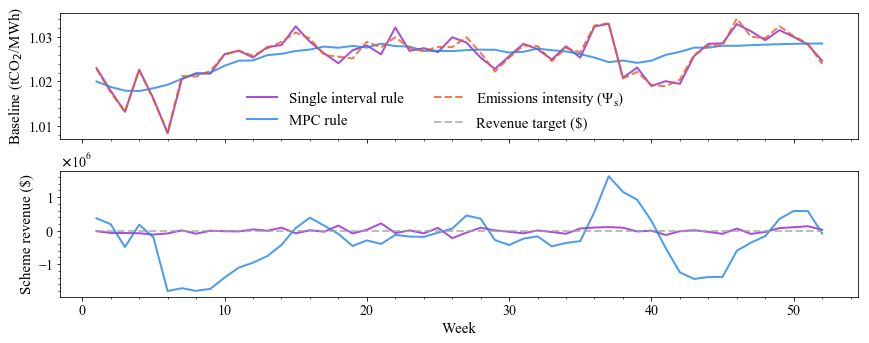

In [6]:
plt.clf()
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

# Revenue re-balancing line colour and style
revenue_rebalancing_format = {'color': '#9721ce', 'linewidth': 2, 'alpha': 0.8}

# MPC line colour and style
mpc_format = {'color': '#2084e8', 'linewidth': 2, 'alpha': 0.8}

# Emissions intensity line
emissions_intensity_format = {'color': '#e85c20', 'linewidth': 2, 'alpha': 0.8, 'linestyle': '--'}

# Revenue target line
revenue_target_format = {'color': '#a0a0a0', 'linewidth': 2, 'linestyle': '--', 'alpha': 0.7}


# Revenue rebalancing
# -------------------
# Baseline
l1, = ax1.plot(x_b1, y_b1, **revenue_rebalancing_format)

# Scheme revenue
ax2.plot(x_r1, y_r1, **revenue_rebalancing_format)


# MPC update
# ----------
# Baseline
l2, = ax1.plot(x_b2, y_b2, **mpc_format)

# Scheme revenue
ax2.plot(x_r2, y_r2, **mpc_format)

# Emissions intensity
l3, = ax1.plot(x_e0, y_e0, **emissions_intensity_format)

# Revenue target
l4, = ax2.plot([1, 52], [0, 0], **revenue_target_format)

# Legend
legend = ax1.legend([l1, l2, l3, l4],
                    ['Single interval rule', 'MPC rule', 'Emissions intensity ($\mathdefault{\Psi_{s}}$)', 'Revenue target (\$)'],
                    ncol=2, fontsize=15, frameon=False, bbox_to_anchor=[0.47, 0.23], loc='center')


# Format ticks
# ------------
ax1.tick_params(labelbottom=False)

# Use scientific notation for scheme revenue
ax2.ticklabel_format(style='sci', axis='y', scilimits=(10, 6))

# Scientific notation format
ax2.yaxis.major.formatter._useMathText = True

# Turn on minor ticks
ax1.minorticks_on()
ax2.minorticks_on()

# Change size of tick labels
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

# Change size of text used in scheme revenue scientific notation exponent
ax2.yaxis.get_offset_text().set_size(14)

# Format axes
# -----------
ax1.set_ylabel('Baseline (tCO$_{2}$/MWh)', fontsize=15)
ax2.set_ylabel('Scheme revenue (\$)', fontsize=15)
ax2.set_xlabel('Week', fontsize=15)

# Set figure size
# ---------------
width = 32
height = 12
cm_to_in = 0.393701
fig.set_size_inches(width*cm_to_in, height*cm_to_in)

# Adjust subplot positions
fig.subplots_adjust(left=0.11, bottom=0.135, right=0.99, top=0.97, wspace=0.2, hspace=0.25)

# Save figure
fig.savefig(os.path.join(output_dir, 'figures', 'ppt-plots', 'presention_revenue_neutral_target.png'), dpi=1200, transparent=True)

plt.show()

#### Positive revenue target case

<Figure size 432x288 with 0 Axes>

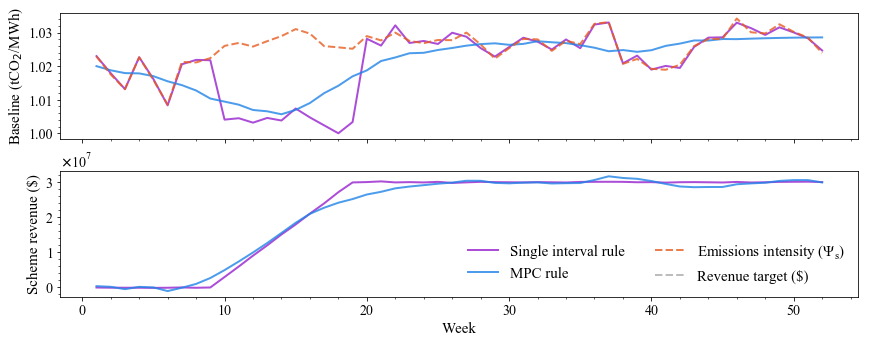

In [7]:
plt.clf()
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

# Revenue rebalancing
# -------------------
# Baseline
l1, = ax1.plot(x_b3, y_b3, **revenue_rebalancing_format)

# Scheme revenue
ax2.plot(x_r3, y_r3, **revenue_rebalancing_format)

# MPC update
# ----------
# Baseline
l2, ax1.plot(x_b4, y_b4, **mpc_format)

# Scheme revenue
ax2.plot(x_r4, y_r4, **mpc_format)

# Emissions intensity
l3, = ax1.plot(x_e0, y_e0, **emissions_intensity_format)

# Revenue ramp
l4, = ax4.plot([1, 9, 19, 52], [0, 0, 30e6, 30e6], **revenue_target_format)

# Legend
legend = ax2.legend([l1, l2, l3, l4], 
                    ['Single interval rule', 'MPC rule', 'Emissions intensity ($\mathdefault{\Psi_{s}}$)', 'Revenue target (\$)'],
                    ncol=2, fontsize=15, frameon=False)


# Format ticks
# ------------
ax1.tick_params(labelbottom=False)

# Use scientific notation for scheme revenue
ax2.ticklabel_format(style='sci', axis='y', scilimits=(10, 6))

# Scientific notation format
ax2.yaxis.major.formatter._useMathText = True

# Turn on minor ticks
ax1.minorticks_on()
ax2.minorticks_on()

# Change size of tick labels
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

# Change size of text used in scheme revenue scientific notation exponent
ax2.yaxis.get_offset_text().set_size(14)

# Format axes
# -----------
ax1.set_ylabel('Baseline (tCO$_{2}$/MWh)', fontsize=15)
ax2.set_ylabel('Scheme revenue (\$)', fontsize=15)
ax2.set_xlabel('Week', fontsize=15)

# Set figure size
# ---------------
width = 32
height = 12
cm_to_in = 0.393701
fig.set_size_inches(width*cm_to_in, height*cm_to_in)

# Adjust subplot positions
fig.subplots_adjust(left=0.11, bottom=0.135, right=0.99, top=0.97, wspace=0.2, hspace=0.25)

# Save figure
fig.savefig(os.path.join(output_dir, 'figures', 'ppt-plots', 'presention_positive_revenue_target.png'), transparent=True, dpi=1200)

plt.show()

#### Anticipated emissions intensity shock

<Figure size 432x288 with 0 Axes>

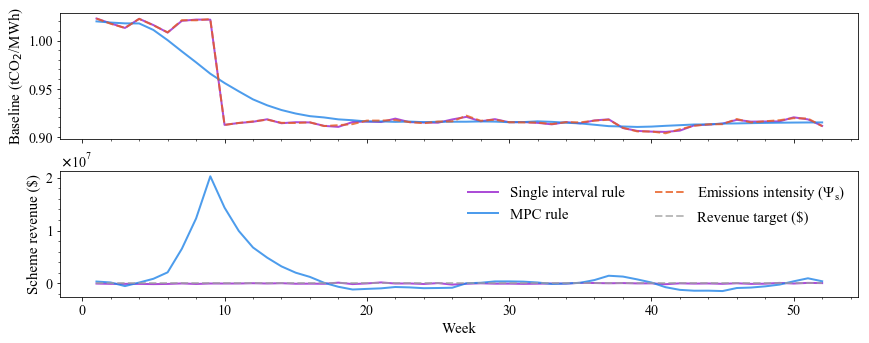

In [8]:
plt.clf()
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

# Revenue rebalancing
# -------------------
# Baseline
ax1.plot(x_b6, y_b6, **revenue_rebalancing_format)

# Scheme revenue
ax2.plot(x_r6, y_r6, **revenue_rebalancing_format)

# MPC update
# ----------
# Baseline
ax1.plot(x_b7, y_b7, **mpc_format)

# Scheme revenue
ax2.plot(x_r7, y_r7, **mpc_format)

# Emissions intensity
ax1.plot(x_e5, y_e5, **emissions_intensity_format)

# Revenue target
l4, = ax2.plot([1, 52], [0, 0], **revenue_target_format)

# Legend
legend = ax2.legend([l1, l2, l3, l4],
                    ['Single interval rule', 'MPC rule', 'Emissions intensity ($\mathdefault{\Psi_{s}}$)', 'Revenue target (\$)'],
                    ncol=2, fontsize=15, frameon=False)


# Format ticks
# ------------
ax1.tick_params(labelbottom=False)

# Use scientific notation for scheme revenue
ax2.ticklabel_format(style='sci', axis='y', scilimits=(10, 6))

# Scientific notation format
ax2.yaxis.major.formatter._useMathText = True

# Turn on minor ticks
ax1.minorticks_on()
ax2.minorticks_on()

# Change size of tick labels
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

# Change size of text used in scheme revenue scientific notation exponent
ax2.yaxis.get_offset_text().set_size(14)

# Format axes
# -----------
ax1.set_ylabel('Baseline (tCO$_{2}$/MWh)', fontsize=15)
ax2.set_ylabel('Scheme revenue (\$)', fontsize=15)
ax2.set_xlabel('Week', fontsize=15)

# Set figure size
# ---------------
width = 32
height = 12
cm_to_in = 0.393701
fig.set_size_inches(width*cm_to_in, height*cm_to_in)

# Adjust subplot positions
fig.subplots_adjust(left=0.11, bottom=0.135, right=0.99, top=0.97, wspace=0.2, hspace=0.25)

# Save figure
fig.savefig(os.path.join(output_dir, 'figures', 'ppt-plots', 'presention_anticipated_shock.png'), transparent=True, dpi=1200)

plt.show()

#### Unanticipated emissions intensity shock

<Figure size 432x288 with 0 Axes>

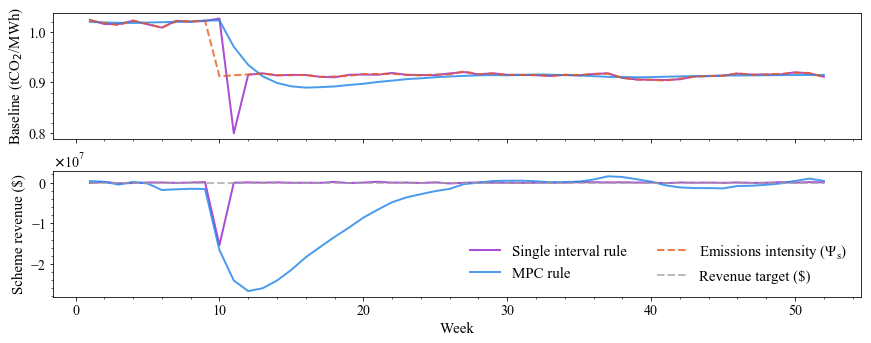

In [9]:
plt.clf()
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

# Revenue rebalancing
# -------------------
# Baseline
ax1.plot(x_b8, y_b8, **revenue_rebalancing_format)

# Scheme revenue
ax2.plot(x_r8, y_r8, **revenue_rebalancing_format)

# MPC update
# ----------
# Baseline
ax1.plot(x_b9, y_b9, **mpc_format)

# Scheme revenue
ax2.plot(x_r9, y_r9, **mpc_format)

# Emissions intensity
ax1.plot(x_e5, y_e5, **emissions_intensity_format)

# Revenue target
l4, = ax2.plot([1, 52], [0, 0], **revenue_target_format)

# Legend
legend = ax2.legend([l1, l2, l3, l4],
                    ['Single interval rule', 'MPC rule', 'Emissions intensity ($\mathdefault{\Psi_{s}}$)', 'Revenue target (\$)'],
                    ncol=2, fontsize=15, frameon=False)


# Format ticks
# ------------
ax1.tick_params(labelbottom=False)

# Use scientific notation for scheme revenue
ax2.ticklabel_format(style='sci', axis='y', scilimits=(10, 6))

# Scientific notation format
ax2.yaxis.major.formatter._useMathText = True

# Turn on minor ticks
ax1.minorticks_on()
ax2.minorticks_on()

# Change size of tick labels
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)

# Change size of text used in scheme revenue scientific notation exponent
ax2.yaxis.get_offset_text().set_size(14)

# Format axes
# -----------
ax1.set_ylabel('Baseline (tCO$_{2}$/MWh)', fontsize=15)
ax2.set_ylabel('Scheme revenue (\$)', fontsize=15)
ax2.set_xlabel('Week', fontsize=15)

# Set figure size
# ---------------
width = 32
height = 12
cm_to_in = 0.393701
fig.set_size_inches(width*cm_to_in, height*cm_to_in)

# Adjust subplot positions
fig.subplots_adjust(left=0.1, bottom=0.135, right=0.99, top=0.97, wspace=0.2, hspace=0.25)

# Save figure
fig.savefig(os.path.join(output_dir, 'figures', 'ppt-plots', 'presention_unanticipated_shock.png'), transparent=True, dpi=1200)

plt.show()

## Create table
Create tables comparing aggregate updating scheme statistics.

In [10]:
# Include business-as-usual case when making comparison
# -----------------------------------------------------
# BAU - no shocks
mask = (Case.case_summaries['shock_option'] == 'NO_SHOCKS') & (Case.case_summaries['update_mode'] == 'NO_UPDATE') & (Case.case_summaries['initial_permit_price'] == 0)
if len(Case.case_summaries[mask].index) != 1:
    raise(Exception(f'Should only encounter 1 index, encountered:{Case.case_summaries[mask].index}'))
else:
    r10 = Case.case_summaries[mask].index[0]
    
# BAU - emissions intensity shock
mask = (Case.case_summaries['shock_option'] == 'EMISSIONS_INTENSITY_SHOCK') & (Case.case_summaries['update_mode'] == 'NO_UPDATE') & (Case.case_summaries['initial_permit_price'] == 0)
if len(Case.case_summaries[mask].index) != 1:
    raise(Exception(f'Should only encounter 1 index, encountered:{Case.case_summaries[mask].index}'))
else:
    r11 = Case.case_summaries[mask].index[0]

Compute aggregate statistics for each case

In [11]:
# Container for aggregate statistics
table = []

# Compute aggregate statistics for each run
for r in [r0, r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11]:
    
    # Import weekly metrics
    with open(os.path.join(results_dir, f'{r}_calibration_interval_metrics.pickle'), 'rb') as f:
        calibration_interval_metrics = pickle.load(f)

    # Import run summary for case
    with open(os.path.join(results_dir, f'{r}_case_summary.pickle'), 'rb') as f:
        case_summary = pickle.load(f)

    # Dictionary to contain aggregate statistics for current case being investigated
    output = {}

    # Average weekly energy price
    _, average_energy_price = Case.get_case_data(r, 'average_energy_price')
    output['average_energy_price'] = f'{np.mean(average_energy_price):.2f} ({np.std(average_energy_price):.2f})'

    # Emissions (total)
    _, total_emissions_tCO2 = Case.get_case_data(r, 'total_emissions_tCO2')
    output['total_emissions_tCO2'] = f'{np.sum(total_emissions_tCO2)/1e6:.2f}'

    # Baseline (weekly average)
    _, baseline = Case.get_case_data(r, 'baseline')
    output['baseline'] = f'{np.mean(baseline):.3f} ({np.std(baseline):.3f})'

    # Difference between scheme revenue and target
    try:
        if case_summary['update_mode'] == 'MPC_UPDATE':
            # Total model horizon
            model_horizon = case_summary['model_horizon']

            # Length of MPC forecast interval
            forecast_interval_mpc = case_summary['forecast_intervals']

            # Target scheme revenue used in model
            target_scheme_revenue_dict = case_summary['target_scheme_revenue']

            # Flatten to dict with single key-value pairs
            target_scheme_revenue = {**{i: j[1] for i, j in target_scheme_revenue_dict.items()},
                                     **{model_horizon-forecast_interval_mpc+i: target_scheme_revenue_dict[model_horizon-forecast_interval_mpc+1][i]
                                        for i in range(1, forecast_interval_mpc+1)}
                                    }

        elif case_summary['update_mode'] == 'REVENUE_REBALANCE_UPDATE':
            # Only a single forecast for rebalancing update
            target_scheme_revenue = {i: j[1] for i, j in case_summary['target_scheme_revenue'].items()}

        # Compute difference between accrued scheme revenue and target for each week
        revenue_difference = pd.Series(calibration_interval_metrics['rolling_scheme_revenue_interval_end']).subtract(pd.Series(target_scheme_revenue))

        # Add to dictionary
        output['revenue_difference'] = f'{revenue_difference.mean()/1e6:.2f} ({revenue_difference.div(1e6).std():.2f})'

    except:
        output['revenue_difference'] = '-'

    # Type of shock
    output['shock_option'] = case_summary['shock_option']
    
    # Model description
    output['description'] = case_summary['description']
    
    # Model run ID
    output['run_id'] = r

    # Append to main container
    table.append(output)

Create tables to be used in manuscript

In [12]:
# Construct table containing aggregated statistics
df_table = pd.DataFrame(table)

# Map case description to tuple which will define new index
description_map = {'carbon tax - no shocks': ('Carbon tax', 'No shock'),
                   'revenue rebalance update - revenue neutral target - no shocks - renewables ineligible': ('Revenue neutral', 'RR'),
                   'mpc update - revenue neutral target - no shocks - renewables ineligible': ('Revenue neutral', 'MPC'),
                   'revenue rebalance update - revenue ramp up target - no shocks - renewables ineligible': ('Revenue target', 'RR'),
                   'mpc update - revenue ramp up target - no shocks - renewables ineligible': ('Revenue target', 'MPC'),
                   'business as usual - no shocks': ('BAU', 'No shock'),
                   'carbon tax - emissions intensity shock': ('Carbon tax', 'shock'),
                   'revenue rebalance update - revenue neutral target - emissions intensity shock - renewables ineligible': ('Anticipated', 'RR'),
                   'mpc update - revenue neutral target - emissions intensity shock - renewables ineligible': ('Anticipated', 'MPC'),
                   'revenue rebalance update - revenue neutral target - emissions intensity shock unanticipated - renewables ineligible': ('Unanticipated', 'RR'),
                   'mpc update - revenue neutral target - emissions intensity shock unanticipated - renewables ineligible': ('Unanticipated', 'MPC'),
                   'business as usual - emissions intensity shock': ('BAU', 'shock'),
                  }

# Get new index based on case description
df_table[['new_index_1', 'new_index_2']] = df_table.apply(lambda x: pd.Series(description_map[x['description']]) if x['description'] in description_map.keys() else pd.Series((10, 20)), axis=1)

# Revenue target results
# ----------------------
mask = ['average_energy_price', 'total_emissions_tCO2', 'baseline', 'revenue_difference']
cols = [('BAU', 'No shock'), ('Carbon tax', 'No shock'), ('Revenue neutral', 'RR'), ('Revenue neutral', 'MPC'), ('Revenue target', 'RR'), ('Revenue target', 'MPC')]
new_index = {'average_energy_price': 'Average price ($/MWh)', 'baseline': 'Baseline (tCO2/MWh)', 'revenue_difference': 'Revenue - Target (million $)', 'total_emissions_tCO2': 'Emissions (MtCO2)'}
df_revenue_target_table = df_table.set_index(['new_index_1', 'new_index_2']).T.reindex(mask).loc[:, cols].rename(index=new_index)
df_revenue_target_table.to_csv(os.path.join(output_dir, 'tables', 'revenue_target_table.csv'))

# Emissions intensity shock results
# ---------------------------------
cols = [('BAU', 'shock'), ('Carbon tax', 'shock'), ('Anticipated', 'RR'), ('Anticipated', 'MPC'), ('Unanticipated', 'RR'), ('Unanticipated', 'MPC')]
new_index = {'average_energy_price': 'Average price ($/MWh)', 'baseline': 'Baseline (tCO2/MWh)', 'revenue_difference': 'Revenue - Target (million $)', 'total_emissions_tCO2': 'Emissions (MtCO2)'}
df_emissions_intensity_shock_table = df_table.set_index(['new_index_1', 'new_index_2']).T.reindex(mask).loc[:, cols].rename(index=new_index)
df_emissions_intensity_shock_table.to_csv(os.path.join(output_dir, 'tables', 'emissions_intensity_shock_table.csv'))

#### Revenue target results table

In [13]:
df_revenue_target_table

new_index_1                             BAU     Carbon tax Revenue neutral  \
new_index_2                        No shock       No shock              RR   
Average price ($/MWh)          29.95 (4.01)   68.25 (2.16)    27.23 (2.22)   
Emissions (MtCO2)                    177.26         173.19          173.19   
Baseline (tCO2/MWh)           0.000 (0.000)  0.000 (0.000)   1.026 (0.005)   
Revenue - Target (million $)    0.00 (0.00)              -    -0.01 (0.08)   

new_index_1                                 Revenue target                 
new_index_2                             MPC             RR            MPC  
Average price ($/MWh)          27.23 (2.22)   27.41 (2.22)   27.41 (2.24)  
Emissions (MtCO2)                    173.19         173.19         173.19  
Baseline (tCO2/MWh)           1.026 (0.003)  1.021 (0.010)  1.021 (0.007)  
Revenue - Target (million $)   -0.29 (0.76)   -0.01 (0.08)   -0.24 (1.31)

#### Emissions intensity shock results table

In [14]:
df_emissions_intensity_shock_table

new_index_1                             BAU         Carbon tax    Anticipated  \
new_index_2                           shock              shock             RR   
Average price ($/MWh)          29.95 (4.01)       64.59 (3.51)   27.30 (2.39)   
Emissions (MtCO2)                    162.68             157.68         157.68   
Baseline (tCO2/MWh)           0.000 (0.000)      0.000 (0.000)  0.932 (0.040)   
Revenue - Target (million $)    0.00 (0.00)  3296.86 (1785.47)   -0.00 (0.08)   

new_index_1                                  Unanticipated                 
new_index_2                             MPC             RR            MPC  
Average price ($/MWh)          27.30 (2.52)   27.30 (2.50)   27.31 (2.28)  
Emissions (MtCO2)                    157.68         157.68         157.68  
Baseline (tCO2/MWh)           0.932 (0.034)  0.932 (0.045)  0.932 (0.044)  
Revenue - Target (million $)    1.47 (4.22)   -0.29 (2.13)   -4.50 (8.06)